# Housing Regression Kaggle Competition
This is a notebook for my submissions based on the following [Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

Given 79 features about residential homes in Iowa (as well as their sale prices), the goal is to predict the price of future homes. 

## Data
We are given two files. $\texttt{train.csv}$ from which our model is trained on, and $\texttt{test.csv}$ from which we make predictions that are submitted. 

## Evaluation
From the list of predicted house prices, our predictions will be scored by taking the RMSE between the logarithm of the predicted sales price and the logarithm of the observed sales price.

## Other
This notebook is meant to be a condensed version of all the work. All files used can be found [here](https://github.com/fattorib/HousingRegression).

# Exploratory Data Analysis
Here, we take a first look at $\texttt{train.csv}$. 

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 50

In [130]:
file_path = 'train.csv'
raw_df = pd.read_csv(file_path)
    
#Getting price data for training
prices = raw_df['SalePrice']
    
attributes_with_price = raw_df.drop(['Id'],axis = 1)

attributes_with_price

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,...,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,...,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,...,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,...,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Missing Data


In [131]:
missing = attributes_with_price.isnull().sum().sort_values(ascending=False)
percent = (attributes_with_price.isnull().sum()/attributes_with_price.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])

In [132]:
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


From this we can see that there are many attributes that are missing. While we will not deal with these missing values now, we will come back to these later during our feature engineering stage, as it is possible that some of these features may not be highly correlated with the sales price. 

## Price Distribution

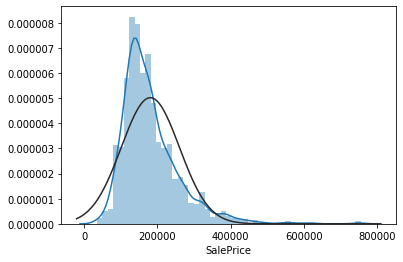

In [133]:
from scipy.stats import norm

%matplotlib inline
sns.distplot(prices,fit = norm)

The price distribution is heavily skewed. When we move to the feature engineering stage, we will need to apply a $\log$ transform. 

From a quick look at $\texttt{train.csv}$, we see that the features are a mix of numerical (Square footage of floors, etc), categorical (Neighbourhood, building type, etc), and ordinal (quality of exterior, quality of basement, etc). When feature engineering, we will have to encode the categorical and ordinal features.


## Numerical Features
The following are a list of all numerical features. 


In [134]:
numerical_features = ['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                      'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                      'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                      'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                      'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

## Categorical Features
The following are a list of all categorical features.


In [135]:
categorical_features = ['MSSubClass', 'MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                        'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                        'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                        'Foundation','BsmtFinType1','BsmtFinType2','Heating','Electrical','Fence',
                        'MiscFeature','SaleType','SaleCondition']

Something to note is that while $\texttt{MSSubClass}$ takes numerical values, it is actually a categorical feature! We will need to watch out for this later. 

## Ordinal Features
Finally, a list of all the ordinal features. These are mostly just quality ratings for different features of the house. 

In [136]:
ordinal_features = ['YearBuilt','YearRemodAdd','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
                    'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageQual','GarageCond','PoolQC']

## Other groupings
Alternatively, we can group features by what they are describing. For example, we could consider all basement features,garage features, or area features.


In [137]:
basement_features = ['SalePrice','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                     'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
garage_features = ['SalePrice','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea',
                   'GarageQual','GarageCond']
area_features = ['SalePrice','LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                 'LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF']

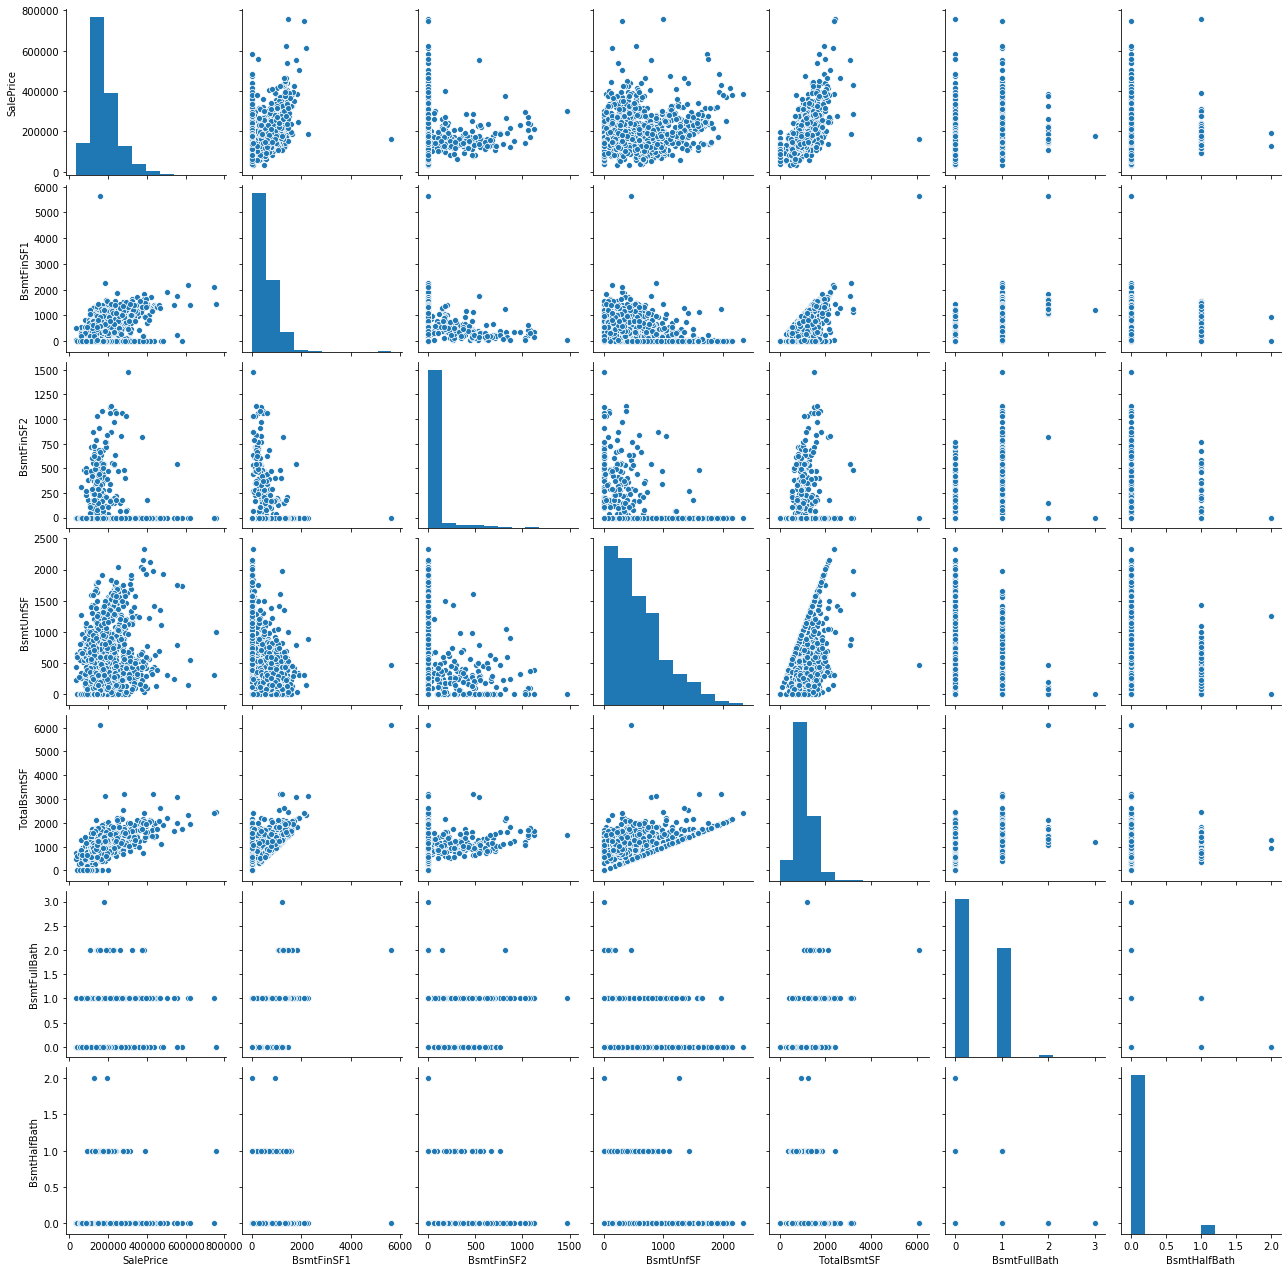

In [138]:
%matplotlib inline
basement_df = attributes_with_price[basement_features]
sns.pairplot(basement_df)

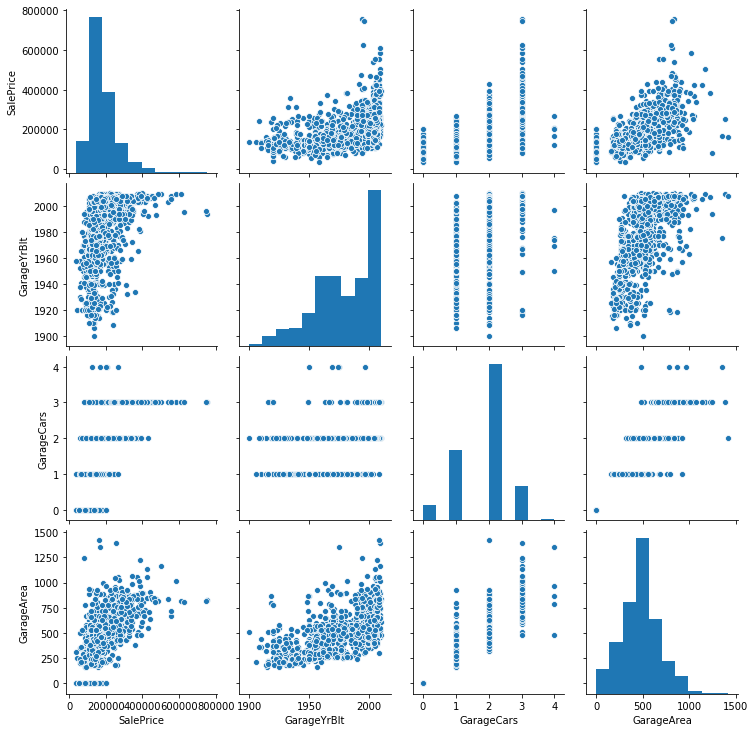

In [139]:
%matplotlib inline
garage_df = attributes_with_price[garage_features]
sns.pairplot(garage_df)

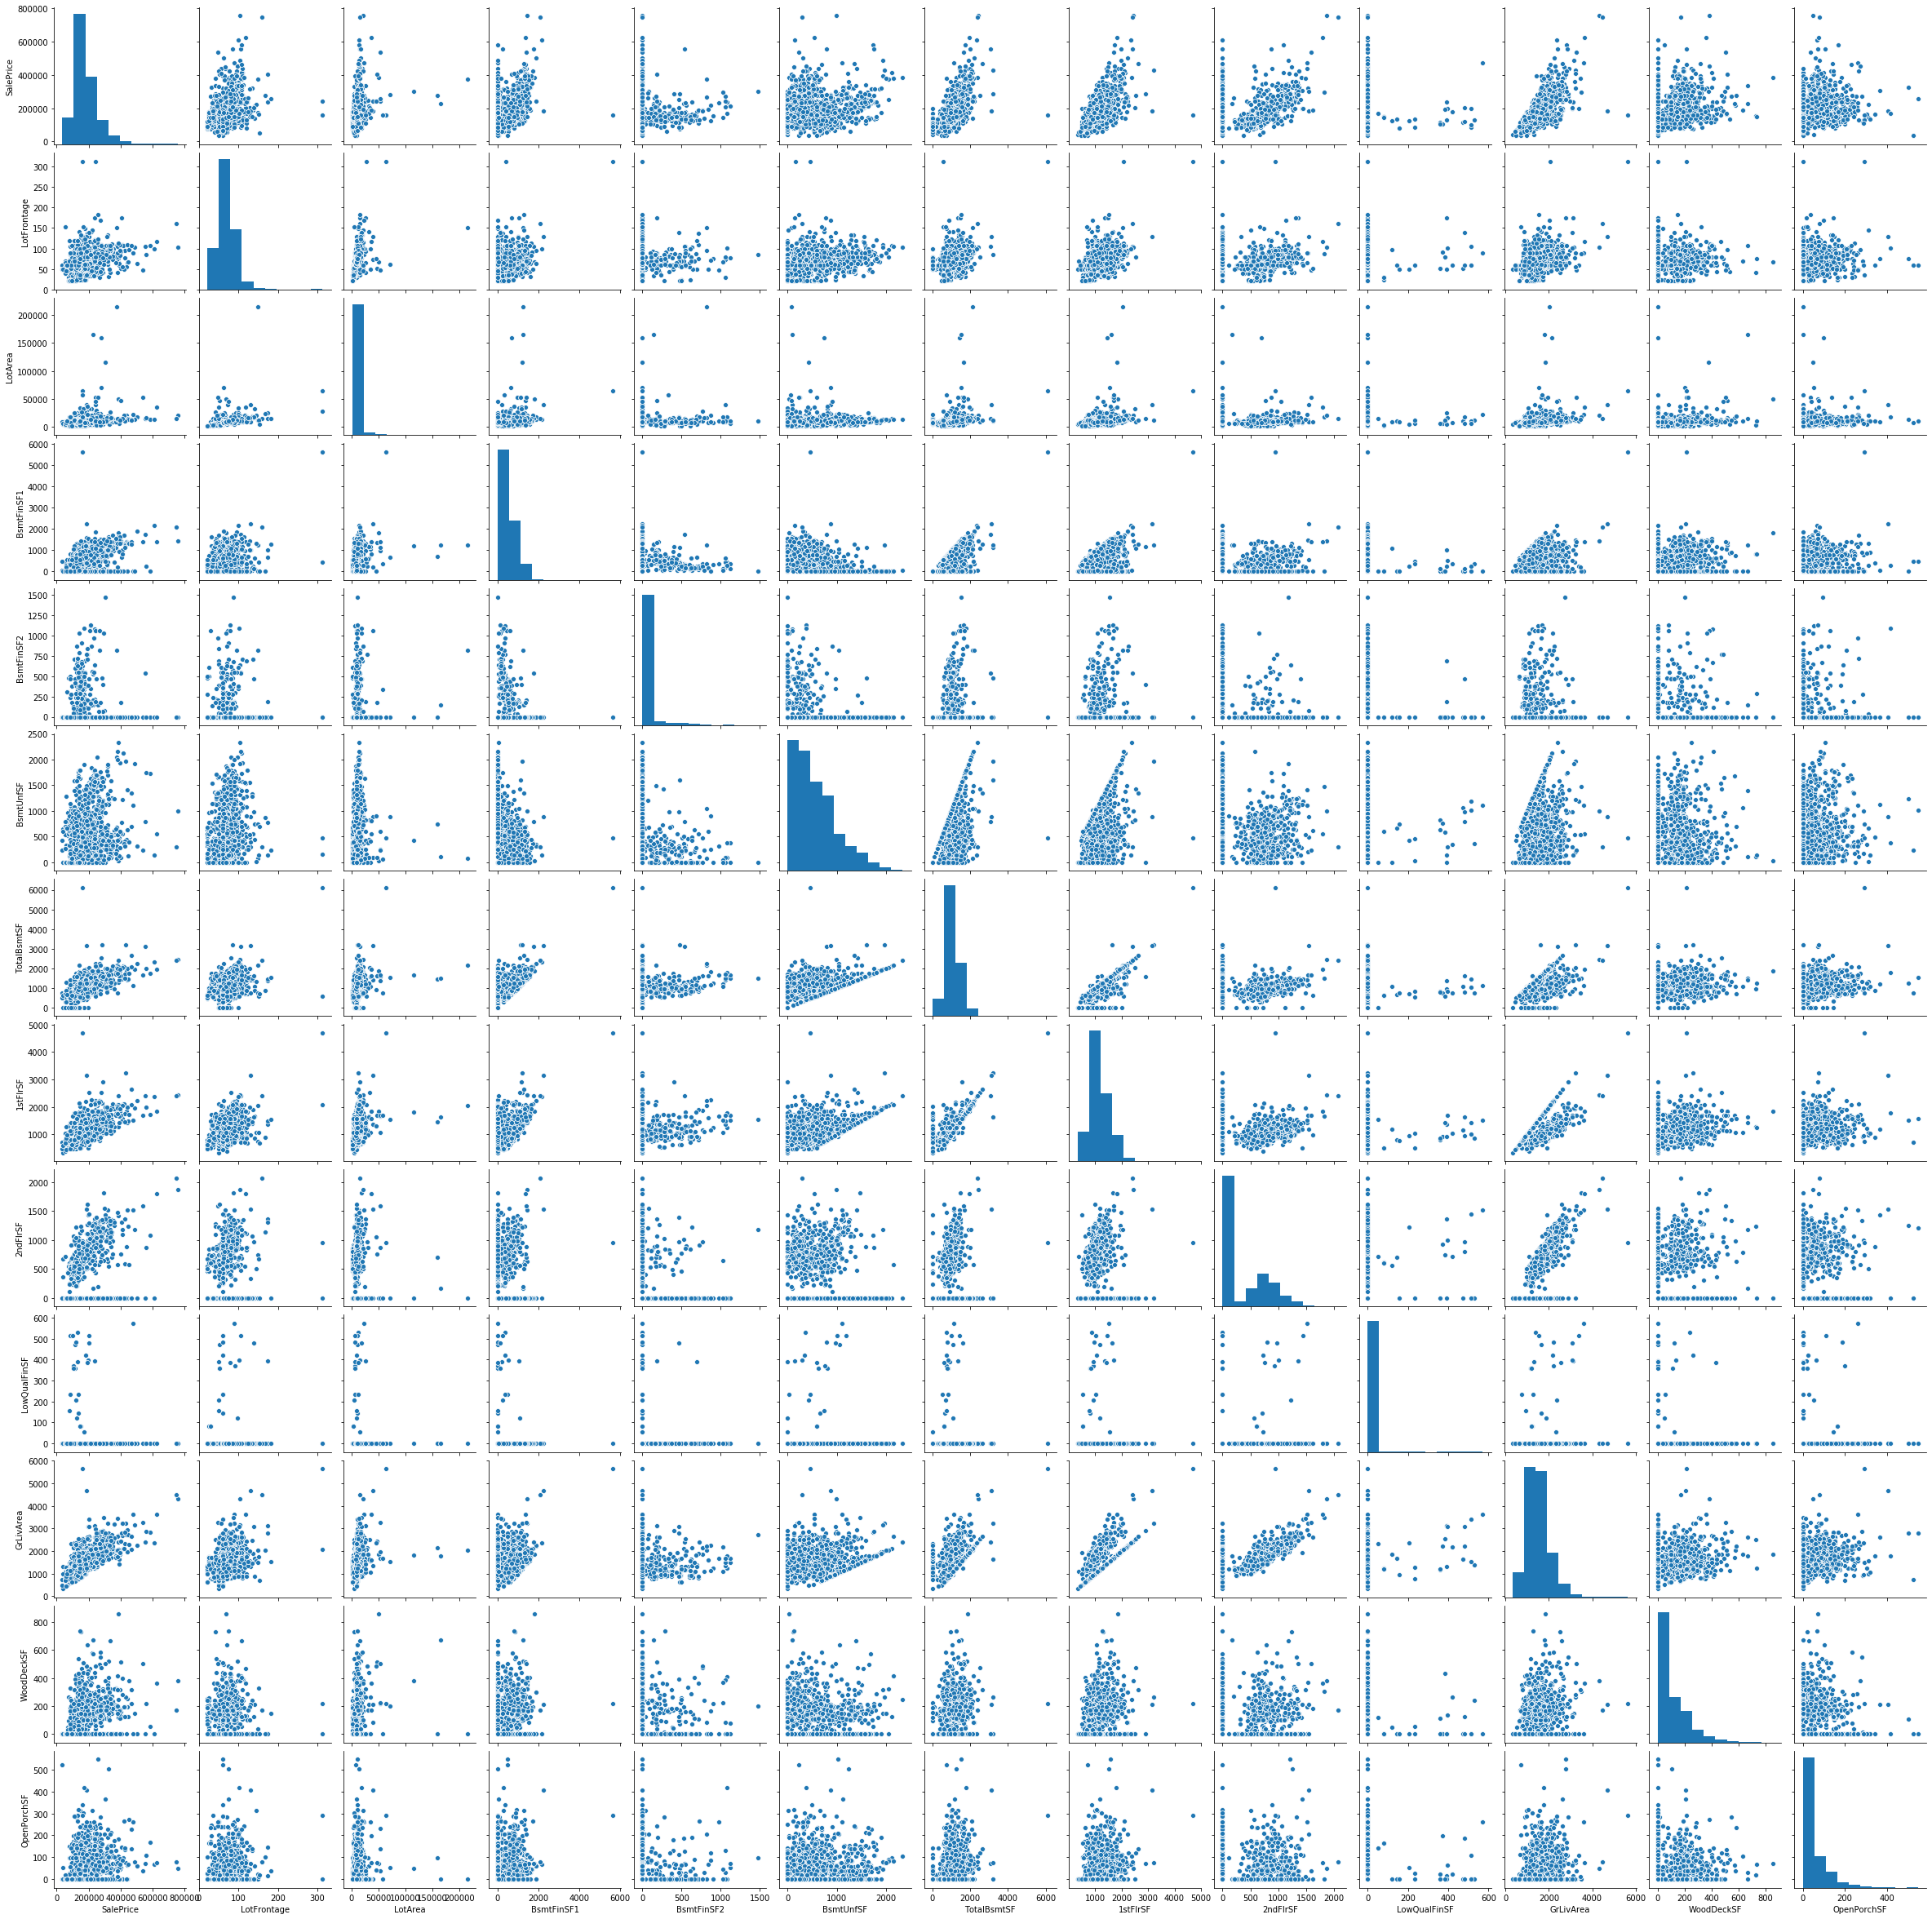

In [140]:
%matplotlib inline
area_df = attributes_with_price[area_features]
sns.pairplot(area_df)

While this isn't very scientific, we see that there is appears to be linear or exponential relations between some of the area features and the sale price. This is a good sign and means that these might be important features for use to use!

## Is there any relation between month or year sold?


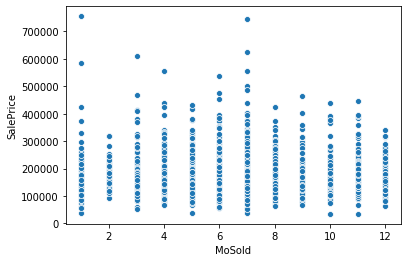

In [141]:
%matplotlib inline
sns.scatterplot(attributes_with_price['MoSold'],attributes_with_price['SalePrice'])

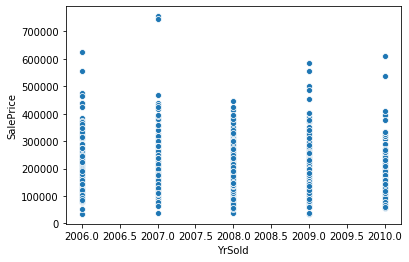

In [142]:
%matplotlib inline
sns.scatterplot(attributes_with_price['YrSold'],attributes_with_price['SalePrice'])

Doesn't really look like it. We'll drop these features when we get to feature engineering. 

# Feature Engineering
Now we can move to the feature engineering stage. Partially motivated by the above exploration, we need to do the following: 
1. Deal with all missing values 
2. Fix the skewed sale price
3. Encode all categorical and ordinal features
4. Perform some type of feature selection
5. (Possible) Feature creation
6. (Possible) normalize numerical features for better performance

## Missing values
There are a total of $19$ features missing entries. The percentages of missing entries ranges from less than $1\%$ (Electrical) to $99\%$ (PoolQC). 

Based on the above dataframe we produced in the EDA portion, we can immediately drop the features that have a large majority of missing data. Those features being: 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'. It is unlikely that we could accurately impute these missing values. 

Looking at the pairplot, we can see that their might be a relation between 'LotFrontage' and 'SalePrice'. Based on the context, we impute all missing values with $0$. 

With respect to all the garage related features, the same $81$ houses are missing these entries. They don't have a garage! 

For the basement features, we see that a very small subset of the data is missing. When looking further, we see that these entries correspond to houses without a basement evidenced by the 'TotalBsmtSF' feature being $0$. We drop these features.

Finally, we drop the rows missing values for the following features: 'MasVnrArea','MasVnrType','Electrical'.

In [143]:
features_to_drop = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','YrSold','MoSold']
rows_to_drop = ['MasVnrArea','MasVnrType','Electrical']

In [144]:
attributes_with_price = attributes_with_price.drop(features_to_drop,axis=1)

In [145]:
attributes_with_price = attributes_with_price.dropna(subset = rows_to_drop)

In [146]:
attributes_with_price['LotFrontage'] = attributes_with_price['LotFrontage'].fillna(0)

In [147]:
attributes_with_price = attributes_with_price.dropna(axis = 1)

Let's take one more look to make sure we removed all the missing values. 

In [148]:
missing = attributes_with_price.isnull().sum().sort_values(ascending=False)
percent = (attributes_with_price.isnull().sum()/attributes_with_price.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
SalePrice,0,0.0
OverallQual,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
MasVnrArea,0,0.0
MasVnrType,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


## Fixing the skewed sales price
As mentioned in the previous section, we apply a $\log$ transform to de-skew the sales price data. 

In [149]:
prices = attributes_with_price['SalePrice']
attributes = attributes_with_price.drop(['SalePrice'],axis = 1)

In [150]:
attributes

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,...,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,...,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,...,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,...,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,WD,Normal
